In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


# random data

In [3]:
random_data = np.loadtxt('sinc_filter_test/random_data.txt')
filtered1_data = np.loadtxt('sinc_filter_test/diff_random_sinc1.txt')
filtered3_data = np.loadtxt('sinc_filter_test/diff3_random_sinc3.txt')

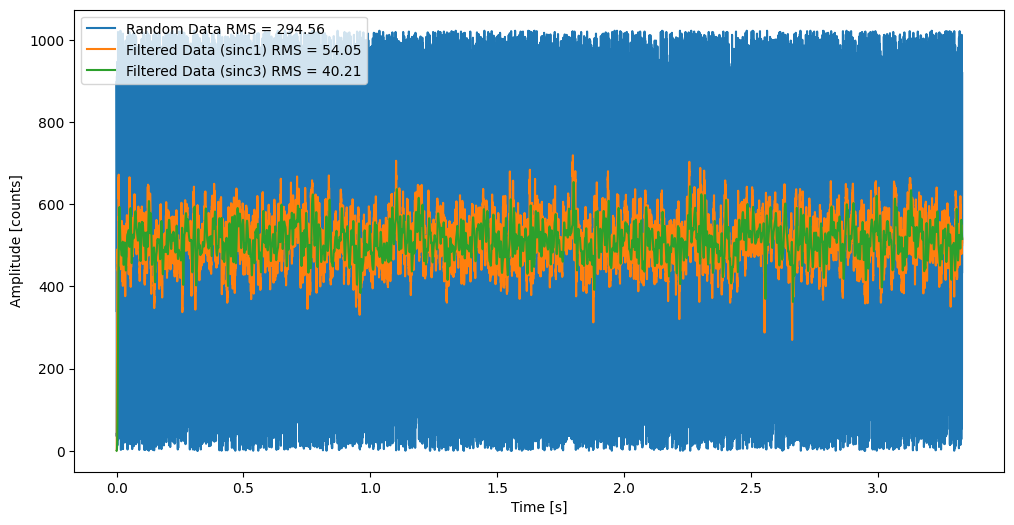

In [10]:
# Plot the data
fs = 9600
t = np.arange(0, len(random_data)/fs, 1/fs)
plt.figure(figsize=(12, 6))
plt.plot(t,random_data, label='Random Data RMS = {:.2f}'.format(np.sqrt(np.mean((random_data[200:len(random_data)]-np.mean(random_data[200:len(random_data)]))**2))))
plt.plot(t,filtered1_data/32, label='Filtered Data (sinc1) RMS = {:.2f}'.format(np.sqrt(np.mean(((filtered1_data[200:len(random_data)]-np.mean(filtered1_data[200:len(random_data)]))/32)**2))))
plt.plot(t,filtered3_data/32**3, label='Filtered Data (sinc3) RMS = {:.2f}'.format(np.sqrt(np.mean(((filtered3_data[200:len(random_data)]-np.mean(filtered3_data[200:len(random_data)]))/32**3)**2))))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [counts]')
#plt.xlim(0, 1000)
plt.legend()
plt.savefig('figures/random_data_sincfilter.pdf')


## FFT of the filtered signal

In [5]:
fs = 9600
random_data_fft = np.fft.fft(random_data)
filtered1_data_fft = np.fft.fft(filtered1_data)
filtered3_data_fft = np.fft.fft(filtered3_data)
freq = np.fft.fftfreq(len(random_data), 1/fs)

### plot of the FFT of the filtered signal

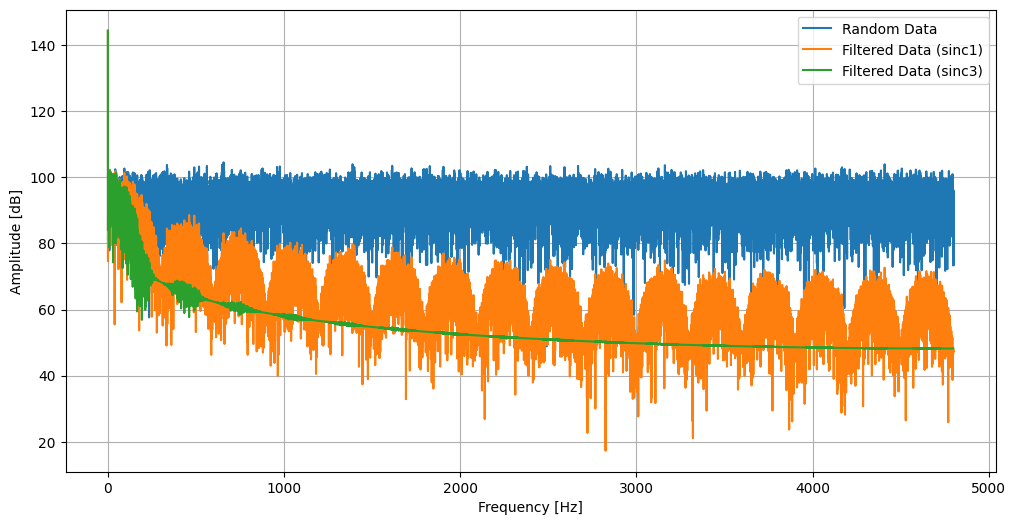

In [11]:
plot_freq = freq[:len(freq)//2]
plot_random_data_fft = random_data_fft[:len(freq)//2]
plot_filtered1_data_fft = filtered1_data_fft[:len(freq)//2]
plot_filtered3_data_fft = filtered3_data_fft[:len(freq)//2]

plt.figure(figsize=(12, 6))
plt.plot(plot_freq, 20*np.log10(np.abs(plot_random_data_fft)), label='Random Data')
plt.plot(plot_freq, 20*np.log10(np.abs(plot_filtered1_data_fft)/32), label='Filtered Data (sinc1)')
plt.plot(plot_freq, 20*np.log10(np.abs(plot_filtered3_data_fft)/32**3), label='Filtered Data (sinc3)')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.grid()
plt.savefig('figures/random_data_sincfilter_frequency.pdf')


# real data

In [12]:
real_data = np.loadtxt('sinc_filter_test/real_data.txt')
filtered1_data = np.loadtxt('sinc_filter_test/diff_real_sinc1.txt')
filtered3_data = np.loadtxt('sinc_filter_test/diff3_real_sinc3.txt')

In [36]:
filtered1_data

array([  99.,  198.,  297., ..., 3114., 3114., 3114.])

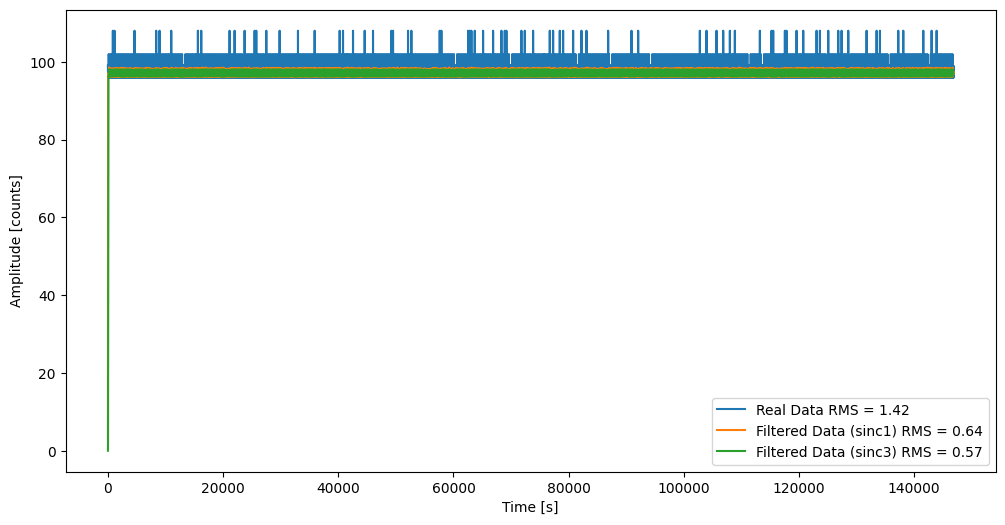

In [14]:
# plot the data
plt.figure(figsize=(12, 6))
plt.plot(real_data, label='Real Data RMS = {:.2f}'.format(np.sqrt(np.mean((real_data[200:len(real_data)]-np.mean(real_data[200:len(real_data)]))**2))))
plt.plot(filtered1_data/32, label='Filtered Data (sinc1) RMS = {:.2f}'.format(np.sqrt(np.mean(((filtered1_data[200:len(real_data)]-np.mean(filtered1_data[200:len(real_data)]))/32)**2))))
plt.plot(filtered3_data/32**3, label='Filtered Data (sinc3) RMS = {:.2f}'.format(np.sqrt(np.mean(((filtered3_data[200:len(real_data)]-np.mean(filtered3_data[200:len(real_data)]))/32**3)**2))))

plt.xlabel('Time [s]')
plt.ylabel('Amplitude [counts]')
#plt.xlim(0, 1000)
plt.legend()
plt.savefig('figures/real_data_sincfilter.pdf')
#plt.xlim(0,32**2)
#plt.xlim(32**3, len(real_data))

## FFT of the filtered signal

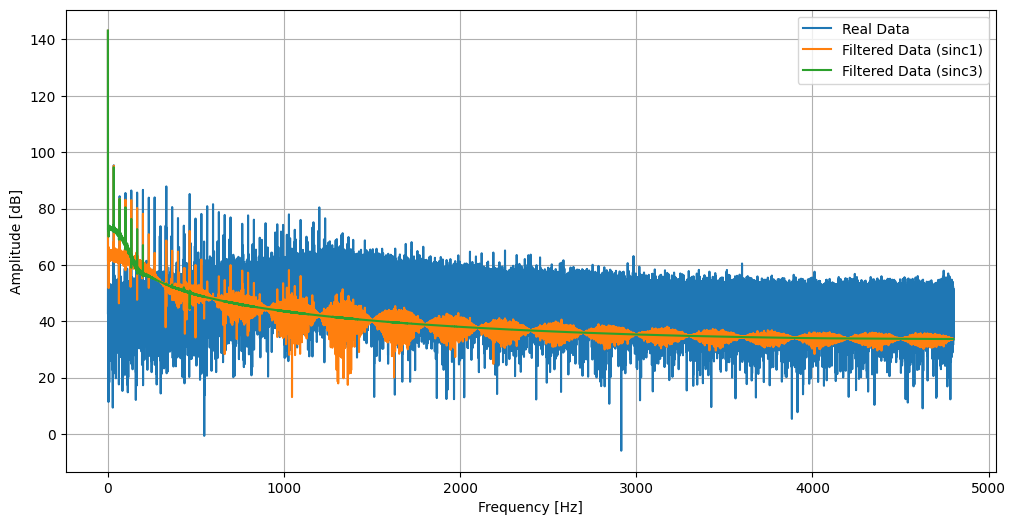

In [15]:
fs = 9600
real_data_fft = np.fft.fft(real_data)
filtered1_data_fft = np.fft.fft(filtered1_data)
filtered3_data_fft = np.fft.fft(filtered3_data)
freq = np.fft.fftfreq(len(real_data), 1/fs)

plot_freq = freq[:len(freq)//2]
plot_real_data_fft = real_data_fft[:len(freq)//2]
plot_filtered1_data_fft = filtered1_data_fft[:len(freq)//2]
plot_filtered3_data_fft = filtered3_data_fft[:len(freq)//2]

plt.figure(figsize=(12, 6))
plt.plot(plot_freq, 20*np.log10(np.abs(plot_real_data_fft)), label='Real Data')
plt.plot(plot_freq, 20*np.log10(np.abs(plot_filtered1_data_fft)/32), label='Filtered Data (sinc1)')
plt.plot(plot_freq, 20*np.log10(np.abs(plot_filtered3_data_fft)/32**3), label='Filtered Data (sinc3)')

plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.grid()
plt.savefig('figures/real_data_sincfilter_frequency.pdf')

(0.0, 2000.0)

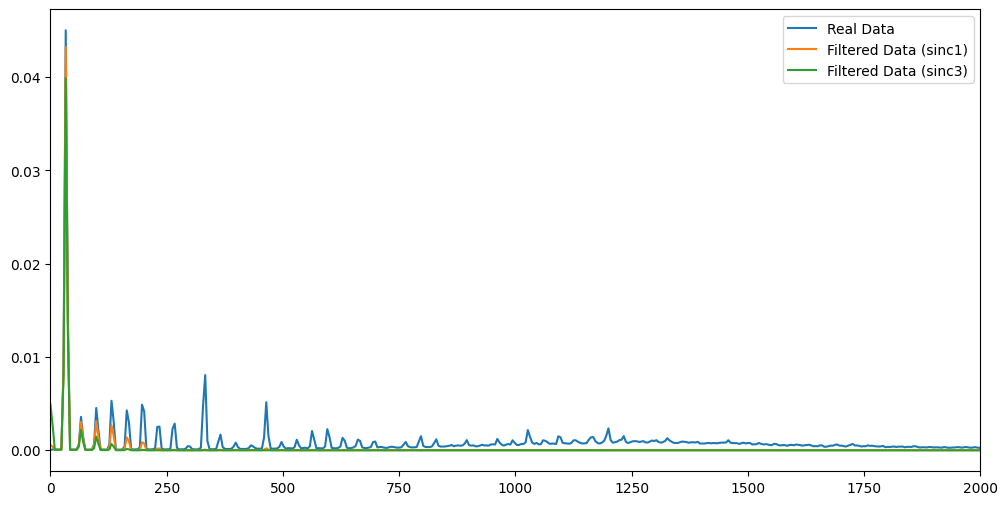

In [29]:
fs = 9600
freq ,real_data_fft = signal.welch(real_data,fs=fs, nperseg=1024*2)
freq, filtered1_data_fft = signal.welch(filtered1_data/32,fs=fs, nperseg=1024*2)
freq, filtered3_data_fft = signal.welch(filtered3_data/32**3,fs=fs, nperseg=1024*2)
#freq = np.fft.fftfreq(len(real_data), 1/fs)

#plot_freq = freq[:len(freq)//2]
#plot_real_data_fft = real_data_fft[:len(freq)//2]
#plot_filtered1_data_fft = filtered1_data_fft[:len(freq)//2]
#plot_filtered3_data_fft = filtered3_data_fft[:len(freq)//2]

plt.figure(figsize=(12, 6))
plt.plot(freq, real_data_fft, label='Real Data')
plt.plot(freq, filtered1_data_fft, label='Filtered Data (sinc1)')
plt.plot(freq, filtered3_data_fft, label='Filtered Data (sinc3)')
plt.legend()
plt.xlim(0, 2000)

# calculate snr of the filtered signal after downsampling


(146815,)
(3564,) (110484,)
(114047,)
1.423418005104583
(110484,)
1.4521990586824578
(3564,)
1.4496109313641756


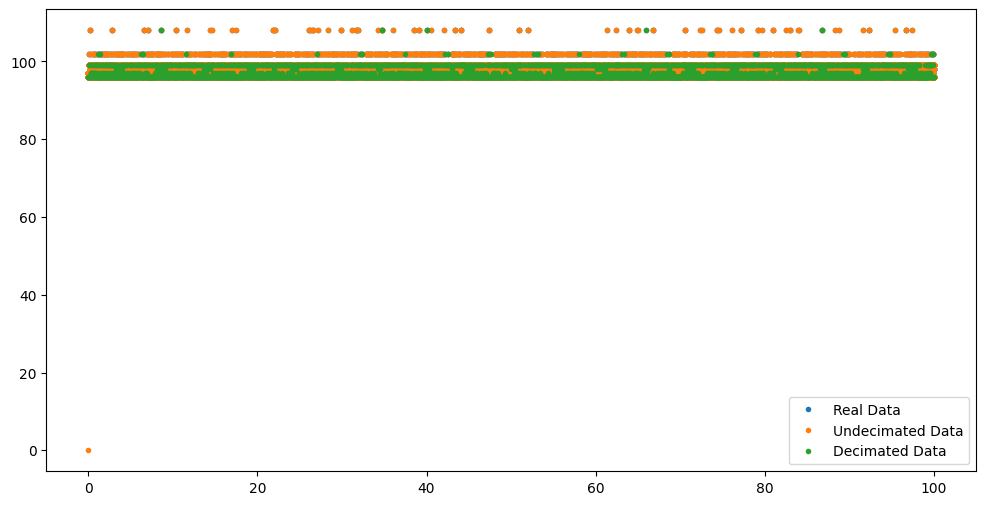

In [16]:

def decimate(data, decimation_factor):
    len = np.shape(data)[0]
    decimated_data = np.zeros(len//decimation_factor+1)
    undecimated_data = np.zeros(len-len//decimation_factor)
    print(np.shape(decimated_data), np.shape(undecimated_data))
    
    for i in range(len):
        if i%decimation_factor == 0:
            decimated_data[i//decimation_factor] = data[i]
        else:
            undecimated_data[i-i//decimation_factor] = data[i]
        
    return decimated_data, undecimated_data

def rms(data):
    # subtracted mean to remove DC component 
    print(np.shape(data))
    return np.sqrt(np.mean((data-np.mean(data))**2))

print(np.shape(real_data))

# remove the first 32**3 samples to allow the filter to settle
real_data = real_data[32**3:]
decimated_data, undecimated_data = decimate(real_data, 32)

t_und = np.linspace(0, 100, len(undecimated_data))
t_dec = np.linspace(0, 100, len(decimated_data))
t = np.linspace(0, 100, len(real_data))
plt.figure(figsize=(12, 6))
plt.plot(t,real_data, ".", label='Real Data')
plt.plot(t_und,undecimated_data, ".",label='Undecimated Data')
plt.plot(t_dec,decimated_data, ".", label='Decimated Data')
plt.legend()

print(rms(real_data))
print(rms(undecimated_data))
print(rms(decimated_data))







(2540,) (78740,)
(81279,)
0.5668086594459502
(78740,)
0.663949895694603
(2540,)
0.566739835017192


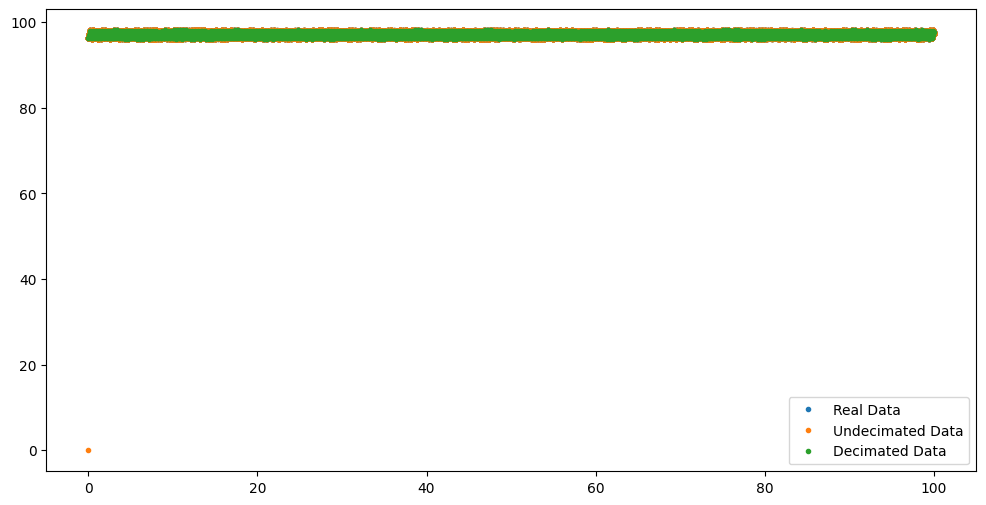

In [19]:
# remove the first 32**3 samples to allow the filter to settle
filtered3_data = filtered3_data[32**3:]

decimated_data, undecimated_data = decimate(filtered3_data/32**3, 32)

t_und = np.linspace(0, 100, len(undecimated_data))
t_dec = np.linspace(0, 100, len(decimated_data))
t = np.linspace(0, 100, len(filtered3_data/32**3))
plt.figure(figsize=(12, 6))
plt.plot(t,filtered3_data/32**3, ".", label='Real Data')
plt.plot(t_und,undecimated_data, ".",label='Undecimated Data')
plt.plot(t_dec,decimated_data, ".", label='Decimated Data')
plt.legend()

print(rms(filtered3_data/32**3))
print(rms(undecimated_data))
print(rms(decimated_data))


In [18]:
20*np.log10(rms(decimated_data)/rms(undecimated_data))

(3564,)
(110484,)


-1.0205095949766088

In [23]:
20*np.log10(263/0.567)

53.327453791937025

(4587,) (142197,)
(146783,)
0.6400218542511218
(142197,)
0.6898157355259578
(4587,)
0.6396866654979101


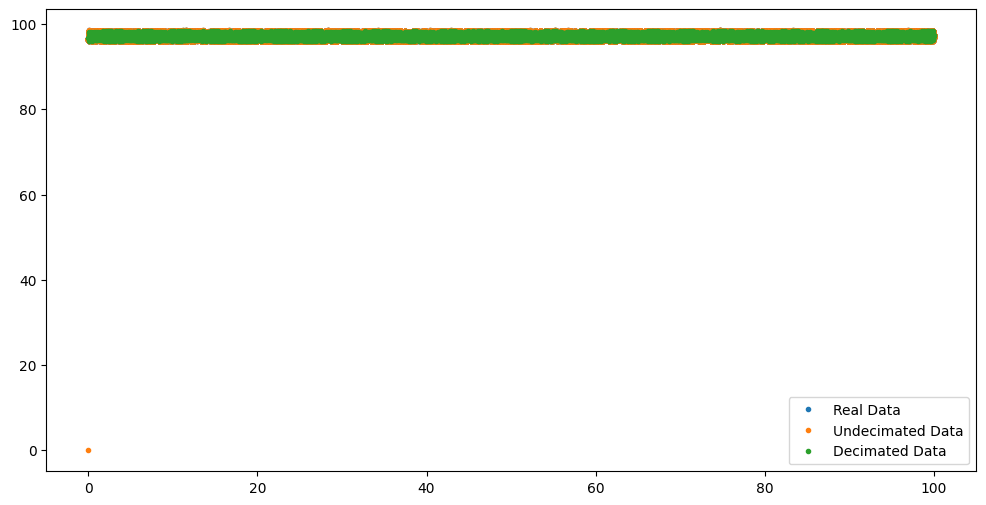

In [33]:
filtered1_data = filtered1_data[32:]/32

decimated_data, undecimated_data = decimate(filtered1_data, 32)

t_und = np.linspace(0, 100, len(undecimated_data))
t_dec = np.linspace(0, 100, len(decimated_data))
t = np.linspace(0, 100, len(filtered1_data))
plt.figure(figsize=(12, 6))
plt.plot(t,filtered1_data, ".", label='Real Data')
plt.plot(t_und,undecimated_data, ".",label='Undecimated Data')
plt.plot(t_dec,decimated_data, ".", label='Decimated Data')
plt.legend()

print(rms(filtered1_data))
print(rms(undecimated_data))
print(rms(decimated_data))

32 16 8

(4460,) (138260,)
(142719,)
0.6188414759117264
(138260,)
0.6716065316613331
(4460,)
0.6188071616035848


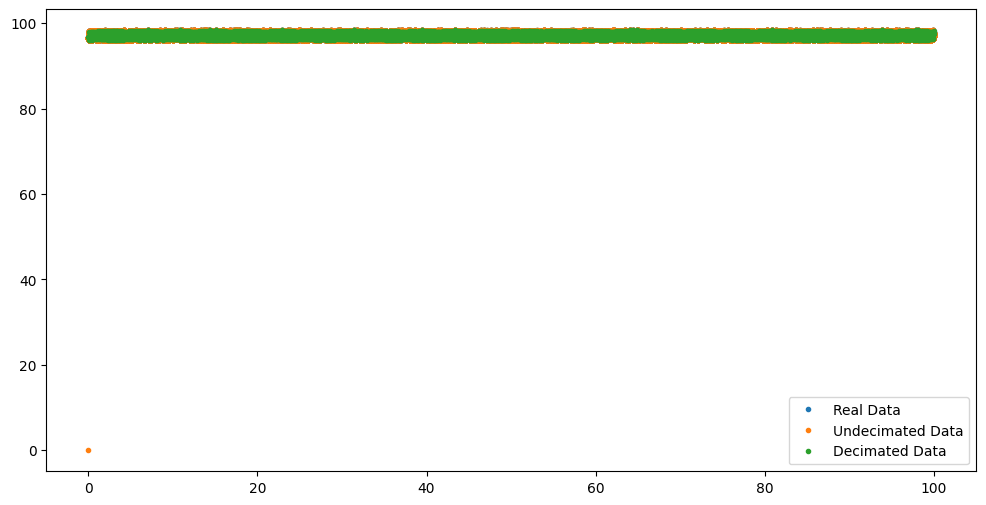

In [30]:
real_data = np.loadtxt('sinc_filter_test/real_data.txt')
filtered1_data = np.loadtxt('sinc_filter_test/diff_real_sinc1.txt')
filtered3_data = np.loadtxt('sinc_filter_test/diff3_real_sinc3.txt')


# remove the first 32**3 samples to allow the filter to settle
filtered3_data = filtered3_data[32*16*8:]

decimated_data, undecimated_data = decimate(filtered3_data/(32*16*8), 32)

t_und = np.linspace(0, 100, len(undecimated_data))
t_dec = np.linspace(0, 100, len(decimated_data))
t = np.linspace(0, 100, len(filtered3_data/(32*16*8)))
plt.figure(figsize=(12, 6))
plt.plot(t,filtered3_data/(32*16*8), ".", label='Real Data')
plt.plot(t_und,undecimated_data, ".",label='Undecimated Data')
plt.plot(t_dec,decimated_data, ".", label='Decimated Data')
plt.legend()

print(rms(filtered3_data/(32*16*8)))
print(rms(undecimated_data))
print(rms(decimated_data))

16 16 32 32

(146815,)
(4556,) (141236,)
(145791,)
0.5785377930309964
(141236,)
0.6335295183832879
(4556,)
0.5785848354451921


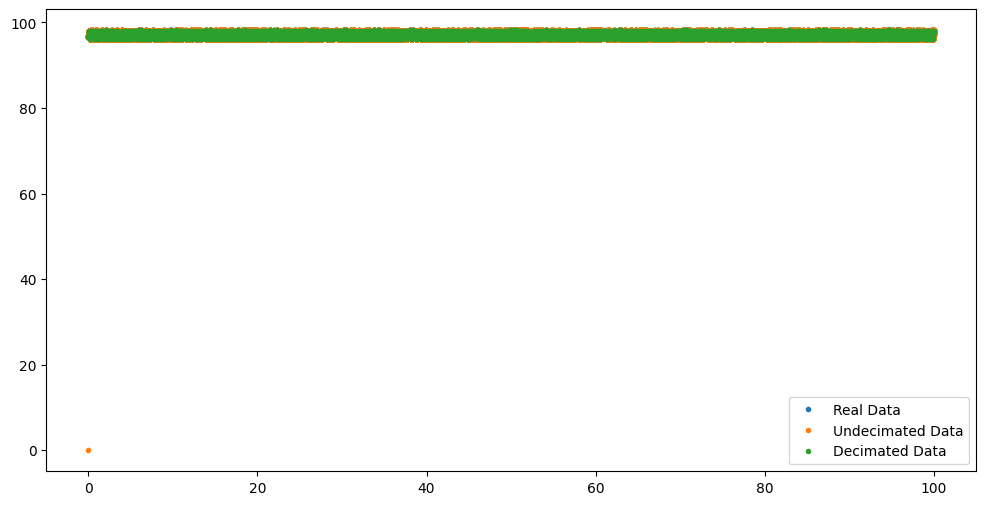

In [39]:
real_data = np.loadtxt('sinc_filter_test/real_data.txt')

filtered4_data = np.loadtxt('sinc_filter_test/diff4_real_sinc4.txt')

print(filtered1_data.shape)

# remove the first 32**3 samples to allow the filter to settle
filtered4_data = filtered4_data[32*32:]

decimated_data, undecimated_data = decimate(filtered4_data/(32*32*16*16), 32)

t_und = np.linspace(0, 100, len(undecimated_data))
t_dec = np.linspace(0, 100, len(decimated_data))
t = np.linspace(0, 100, len(filtered4_data/(32*32*16*16)))
plt.figure(figsize=(12, 6))
plt.plot(t,filtered4_data/(32*32*16*16), ".", label='Real Data')
plt.plot(t_und,undecimated_data, ".",label='Undecimated Data')
plt.plot(t_dec,decimated_data, ".", label='Decimated Data')
plt.legend()

print(rms(filtered4_data/(32*32*16*16)))
print(rms(undecimated_data))
print(rms(decimated_data))

32 32 32 32

In [ ]:
real_data = np.loadtxt('sinc_filter_test/real_data.txt')

filtered4_data = np.loadtxt('sinc_filter_test/diff4_real_sinc4.txt')

print(filtered1_data.shape)

# remove the first 32**3 samples to allow the filter to settle
filtered4_data = filtered4_data[32*32:]

decimated_data, undecimated_data = decimate(filtered4_data/(32*32*16*16), 32)

t_und = np.linspace(0, 100, len(undecimated_data))
t_dec = np.linspace(0, 100, len(decimated_data))
t = np.linspace(0, 100, len(filtered4_data/(32*32*16*16)))
plt.figure(figsize=(12, 6))
plt.plot(t,filtered4_data/(32*32*16*16), ".", label='Real Data')
plt.plot(t_und,undecimated_data, ".",label='Undecimated Data')
plt.plot(t_dec,decimated_data, ".", label='Decimated Data')
plt.legend()

print(rms(filtered4_data/(32*32*16*16)))
print(rms(undecimated_data))
print(rms(decimated_data))